Prepare the dataset and train a model on the data.

In [5]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(project_root)

from examples.mia.tabular_mia.utils.adult_data_preparation import (
    download_adult_dataset,
    get_adult_dataloaders,
    preprocess_adult_dataset,
)
from examples.mia.tabular_mia.utils.adult_model_preparation import AdultNet, create_trained_model_and_metadata

# Generate the dataset and dataloaders
path = os.path.join(os.getcwd(), "data/")

download_adult_dataset(path)
dataset = preprocess_adult_dataset(path)

n_features = dataset.x.shape[1]
n_classes = 1
train_loader, test_loader = get_adult_dataloaders(dataset, train_fraction=0.2, test_fraction=0.3)

# Train the model
if not os.path.exists("target"):
    os.makedirs("target")
model = AdultNet(input_size=n_features, hidden_size=64, num_classes=n_classes)
train_acc, train_loss, test_acc, test_loss = create_trained_model_and_metadata(model,
                                                                               train_loader,
                                                                               test_loader,
                                                                               epochs=1)

Directory already exists: /home/johan/project/LeakPro/examples/mia/tabular_mia/data/


Training Progress:   0%|          | 0/10 [00:00<?, ?it/s]

Training Progress: 100%|██████████| 10/10 [00:03<00:00,  2.90it/s]


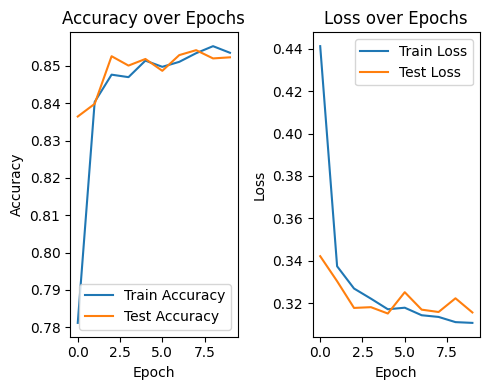

In [6]:
import matplotlib.pyplot as plt

# Plot training and test accuracy
plt.figure(figsize=(5, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label="Train Accuracy")
plt.plot(test_acc, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

# Plot training and test loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label="Train Loss")
plt.plot(test_loss, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

Create LeakPro objects and run attack

In [8]:
from adult_handler import AdultInputHandler

from leakpro import LeakPro

# Read the config file
config_path = "audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(AdultInputHandler, config_path)

# Run the audit
mia_results = leakpro.run_audit(return_results=True)

2025-02-22 12:19:09,638 INFO     Target model blueprint created from AdultNet in utils/adult_model_preparation.py.
2025-02-22 12:19:09,683 INFO     Loaded target model metadata from ./target/model_metadata.pkl
2025-02-22 12:19:09,689 INFO     Loaded target model from ./target


2025-02-22 12:19:09,718 INFO     Loaded population dataset from ./data/adult_data.pkl
2025-02-22 12:19:09,719 INFO     Loaded population dataset from ./data/adult_data.pkl
2025-02-22 12:19:09,720 INFO     Image extension initialized.
2025-02-22 12:19:09,723 INFO     Data contains 8 categorical columns and 6 continuous columns.
2025-02-22 12:19:09,724 INFO     Data is one-hot encoded: True
2025-02-22 12:19:09,725 INFO     MIA attack factory loaded.
2025-02-22 12:19:09,726 INFO     Configuring the RMIA attack
2025-02-22 12:19:09,727 INFO     Added attack: rmia
2025-02-22 12:19:09,727 INFO     Configuring the Population attack
2025-02-22 12:19:09,728 INFO     Added attack: population
2025-02-22 12:19:09,729 INFO     Added attack: lira
2025-02-22 12:19:09,730 INFO     Configuring Loss trajectory attack
2025-02-22 12:19:09,732 INFO     Added attack: loss_traj
2025-02-22 12:19:09,733 INFO     Preparing attack: rmia
2025-02-22 12:19:09,734 INFO     Preparing shadow models for RMIA attack
2025

KeyboardInterrupt: 

## Generate report

In [ ]:
# Import and initialize ReportHandler
from leakpro.reporting.report_handler import ReportHandler

# report_handler = ReportHandler()
report_handler = ReportHandler(report_dir="./leakpro_output/results")

# Save MIA resuls using report handler
for res in mia_results:
    report_handler.save_results(attack_name=res.attack_name, result_data=res, config=res.configs)

# # Create the report by compiling the latex text
report_handler.create_report()